In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.formula.api as smf
%pylab inline

#import seaborn as sns
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# reading in county population data from 1800
# source: Wealth and Officeholding in Antebellum Georgia" https://github.com/jvpoulos/ga-lottery
df = pd.read_csv('https://raw.githubusercontent.com/jvpoulos/ga-lottery/master/counties-1800.csv')
df.head(2)

,state,county,name,totpop,totpopc,urb800,urb25,wm09,wm1015,wm1625,...,totpop2,region1,region2,level,fips,statefip,wmtot,wftot,whtot,nwtot
0,1,10,FAIRFIELD,38208,38208,0,0,5929.0,2863.0,3150.0,...,38208.0,1.0,1.0,1,9001.0,9,18442.0,18533.0,36975.0,1233.0
1,1,30,HARTFORD,42147,42147,3523,0,6412.0,3421.0,3779.0,...,42147.0,1.0,1.0,1,9003.0,9,20701.0,20636.0,41337.0,810.0


In [3]:
# new df for comparing total population against urban population by county in 1800
skinny = df[['name', 'county', 'totpop', 'urb800']]
skinny.shape

(448, 4)

# Remove outliers

In [4]:
# look just at state total
skinny = skinny[skinny['county'] == 0]
skinny = skinny[skinny['name'] != 'UNITED STATES']
skinny = skinny[skinny['name'] != 'VIRGINIA']

# remove 0 urbpop states
skinny = skinny[skinny['urb800'] != 0]
skinny

,name,county,totpop,urb800
8,CONNECTICUT,0,251002,12722
15,MAINE,0,151719,3704
28,MASSACHUSETTS,0,422845,65300
34,NEW HAMPSHIRE,0,183858,5339
40,RHODE ISLAND,0,69122,14353
100,NEW YORK,0,586761,74757
135,PENNSYLVANIA,0,602365,68354
271,GEORGIA,0,162686,5146
362,SOUTH CAROLINA,0,345591,18824
426,MARYLAND,0,341548,26514


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


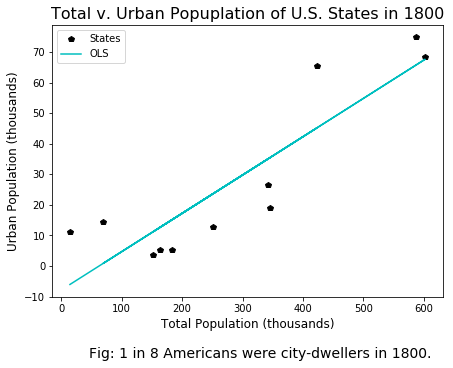

In [87]:
x = skinny['totpop'] / 1000
y = skinny['urb800'] / 1000

lm = smf.ols(formula = "y ~ x", data=skinny).fit()
lm.summary()

ax = plt.figure(num=None, figsize=(7, 5))
rects = ax.patches

plt.grid(False)

plt.plot(x, y, 'kp', label='States')
plt.plot(x, lm.predict(), 'c-', label='OLS')
plt.xlabel('Total Population (thousands)', fontsize = 12)
plt.ylabel('Urban Population (thousands)', fontsize = 12)
plt.title('Total v. Urban Popuplation of U.S. States in 1800', fontsize=16)
#plt.legend(loc='lower right', fontsize = 16, frameon=True, edgecolor="b")
plt.legend()
plt.text(x=45, y = -30, s='Fig: 1 in 8 Americans were city-dwellers in 1800.', fontsize = 14)
"""my_xticks = ['John','Arnold','Mavis','Matt']
plt.xticks(x, my_xticks)"""



    
"""for rect, label in zip(rects, mylist):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height/2, label, ha='center', va='bottom')
"""
plt.show()

In [86]:
pl

SyntaxError: invalid syntax (<ipython-input-86-5ea3ca31d4a0>, line 1)

In [41]:
plt.plot?

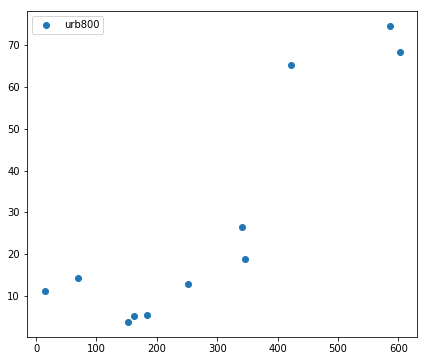

In [7]:
ax = plt.figure(num=None, figsize=(7, 6)).add_subplot(111)
ax = plt.scatter(x, y)
ax = plt.gca()
ax.set_facecolor('w')
#plt.xlabel('Total Pop')

plt.legend()

In [8]:
# add regression line
# add colorblind test
# add legend
# add title
# add axis labels
# check lecture notes for more
# look at federica's code for plotting direction

In [45]:
plt.plot?